In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# windowspath = "C:\Users\karthikeya\Desktop\MachineLearning\DecisionTree"
# macpath =    "//Users//karthikeya//Desktop//UpX_Learning//MachineLearning//DecisionTrees//" 
local_path = "C:\\Users\\karthikeya\\Desktop\\MachineLearning\\DecisionTree\\"

In [3]:
train_df = pd.read_csv(local_path+"titanic.csv")
test_df = pd.read_csv(local_path+"titanic_test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Missing values observed in Age, Cabin and Embarked columns. No. of rows = 891, No. of columns = 12

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Descriptive stats : High STD for PassengerId and Fare. DT doesn't need scaling for features.

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


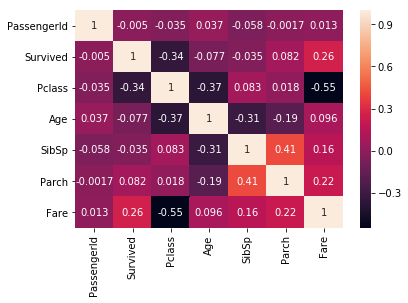

In [12]:
correlation = train_df.corr()
sns.heatmap(correlation, annot=True)

Survived column is positively correlated with Fare and its negatively correlated with Pclass.

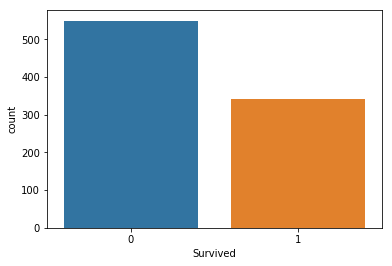

In [13]:
sns.countplot(x="Survived", data=train_df)

Observe the usage of 2 categorical columns in the factor plot

C:\Users\karthikeya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 360x360 with 0 Axes>

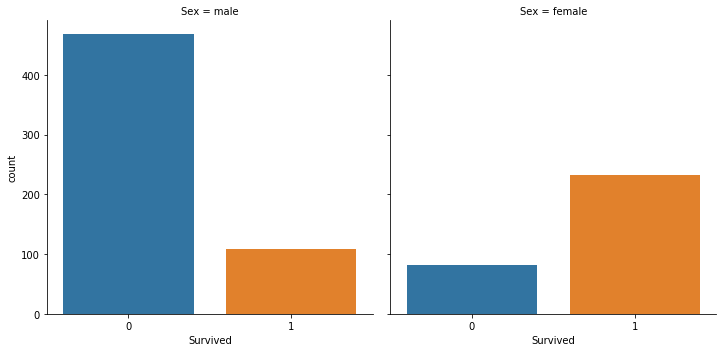

In [14]:
plt.figure(figsize=(5,5))
sns.factorplot(x="Survived", col="Sex", kind="count", data=train_df)
plt.show()

C:\Users\karthikeya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


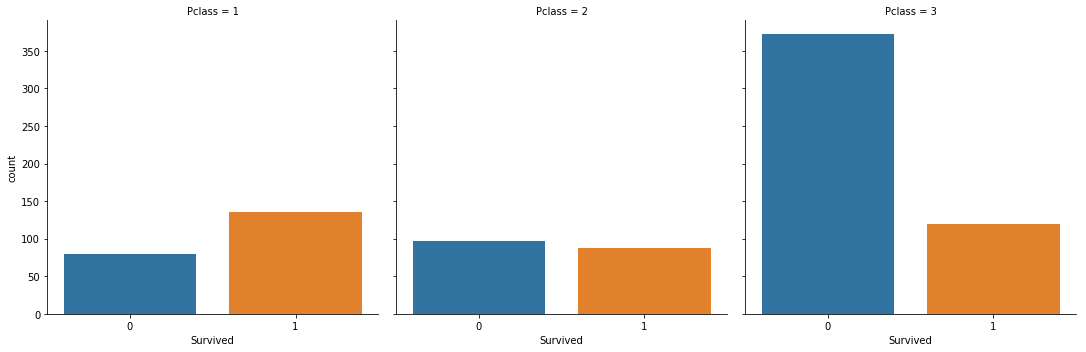

In [15]:
sns.factorplot(x="Survived", col="Pclass", kind="count", data=train_df)


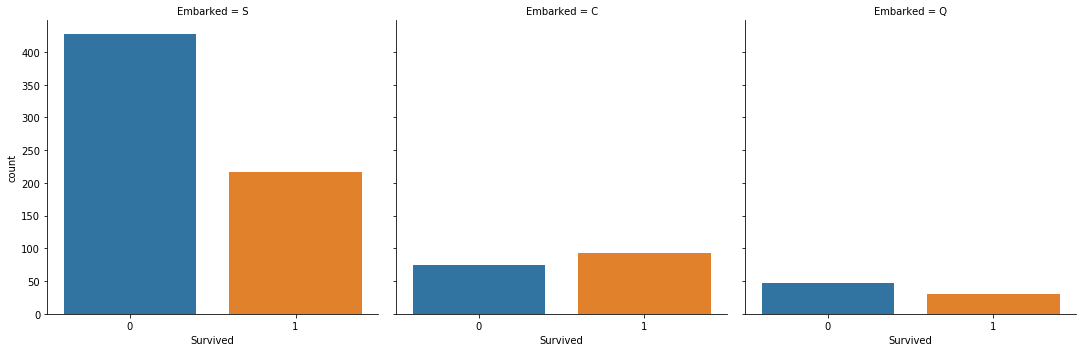

In [16]:
sns.catplot(x="Survived", col="Embarked", kind="count", data=train_df)
#catplot is the new name of factorplot


Observation 1 : Survival rate of female is higher compared to male in the overall observations.

Observation 2 : Survival rate is more in Class 1 compared to 2 or 3.

Observation 3 : Survival rate is comparitively high who have Embarked from Port C compared to other ports. 

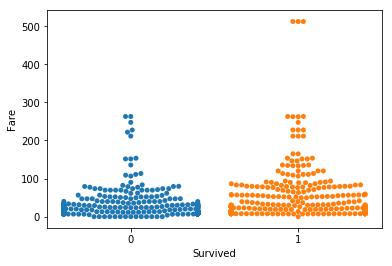

In [17]:
sns.swarmplot(x='Survived', y='Fare', data=train_df)

Fare has negligible effect on the Survivial column

In the model we are usually dealing with columns with numerical values. Hence we convert Sex with categorical value with numerical value using Feature Engineering.

In our example Survival is the label  and we use Sex, Pclass, SibSp and Age as our features.

#### Feature Engineering

In [18]:
train_df['Sex'] = train_df['Sex'].apply(lambda sex : 0 if sex == 'male' else 1)

In [19]:
train_df.groupby('Sex').size() #male = 0 and female = 1

Sex
0    577
1    314
dtype: int64

#### Seperate features and labels 

In [20]:
columns = ["Pclass", "Sex", "Age", "SibSp"]
features = train_df[list(columns)].values
y = train_df['Survived'].values

In [21]:
#Fill missing values with the mean of those columns. strategy is 'most_frequent' for mode.
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
x = imp.fit_transform(features)
x

C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 3.        ,  0.        , 22.        ,  1.        ],
       [ 1.        ,  1.        , 38.        ,  1.        ],
       [ 3.        ,  1.        , 26.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765,  1.        ],
       [ 1.        ,  0.        , 26.        ,  0.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ]])

#### Create an instance of the Decision tree

In [22]:
from sklearn import tree
my_tree_1 = tree.DecisionTreeClassifier(max_depth = 2)

#### Train the decison tree 

In [23]:
my_tree_1 = my_tree_1.fit(x,y)

Finding the weightage and importances of each feature in the model

In [24]:
list(zip(columns, my_tree_1.feature_importances_))

[('Pclass', 0.1865819978729801),
 ('Sex', 0.7449736780776716),
 ('Age', 0.06844432404934823),
 ('SibSp', 0.0)]

Accuracy of the model

In [25]:
print(my_tree_1.score(x,y))

0.7957351290684624


#### Graphviz is used to visualize the app

In [26]:
import graphviz
with open('tree.dot', 'w') as dotfile:
    tree.export_graphviz(my_tree_1, out_file=dotfile, feature_names = columns, filled=True)
    dotfile.close()

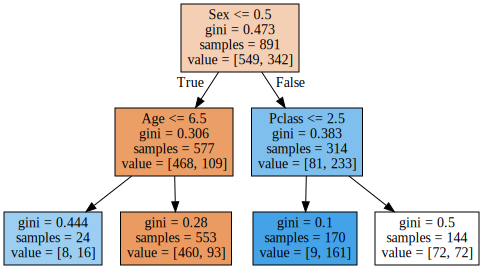

In [27]:
from graphviz import Source
with open('tree.dot', 'r') as file:
  text = file.read()
  plot = Source(text)

plot

#### Now dealing with the testing data from a seperate csv file

In [28]:
test_df['Sex'] = test_df['Sex'].apply(lambda sex : 0 if sex == 'male' else 1)

Fill the missing values in the test data

In [29]:
features_test = test_df[list(columns)].values
imp_test = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
x_test = imp_test.fit_transform(features_test)

C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### Prediction from the model 

In [30]:
y_pred = my_tree_1.predict(x_test)
print(y_pred.shape)

pred = my_tree_1.predict(x)
print(pred.shape)

(418,)
(891,)


#### Evaluating the model performance

In [31]:
from sklearn import metrics
df_confusion = metrics.confusion_matrix(y,pred)
print(df_confusion)

[[532  17]
 [165 177]]


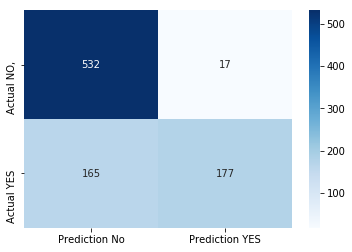

In [32]:
sns.heatmap(df_confusion, cmap='Blues', xticklabels=['Prediction No', 'Prediction YES'], yticklabels = ['Actual NO,', 'Actual YES'], annot=True, fmt='d')

In [33]:
classification_report = metrics.classification_report(y, pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       549
           1       0.91      0.52      0.66       342

   micro avg       0.80      0.80      0.80       891
   macro avg       0.84      0.74      0.76       891
weighted avg       0.82      0.80      0.78       891



#### Parameter tuning -  Adding more parameters while creating the instance of the model to get better result 

In [34]:
my_tree_2 = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=45)

In [35]:
my_tree_2 = my_tree_2.fit(x,y)

Compare the accuracy of the trees

In [36]:
print(my_tree_2.score(x,y))
print(my_tree_1.score(x,y))

0.8720538720538721
0.7957351290684624


In [37]:
y_pred2 = my_tree_2.predict(x)

In [38]:
confusion_matrix_2 = metrics.confusion_matrix(y,y_pred2)

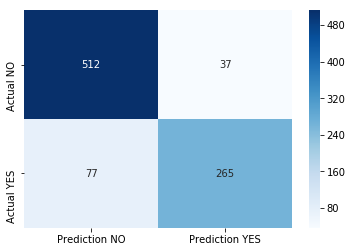

In [39]:
sns.heatmap(confusion_matrix_2, cmap='Blues', xticklabels=['Prediction NO', 'Prediction YES'], yticklabels=['Actual NO', 'Actual YES'], annot=True, fmt='d')

In [40]:
classification_report_2 = metrics.classification_report(y,y_pred2)
print(classification_report_2)
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       549
           1       0.88      0.77      0.82       342

   micro avg       0.87      0.87      0.87       891
   macro avg       0.87      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       549
           1       0.91      0.52      0.66       342

   micro avg       0.80      0.80      0.80       891
   macro avg       0.84      0.74      0.76       891
weighted avg       0.82      0.80      0.78       891



When more depth is involved in the tree and we start using more params like min_samples_split we can see an improvement in the model prediction.